In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [125]:
df = pd.read_csv('../matrix_mul/tests2.csv')
df_opt_par = pd.read_csv('../matrix_mul/tests_opt_par_1.csv')

In [114]:
df['time'] = df.time / 1000.0

In [130]:
df = df.groupby(['V', 'algorithmId']).apply(
  lambda x: x.loc[
    x.time.between(x.time.quantile(.25), x.time.quantile(.75))
  ]
).reset_index(drop=True)
df_opt_par = df_opt_par.groupby(['V', 'boundary']).apply(
  lambda x: x.loc[
    x.time.between(x.time.quantile(.25), x.time.quantile(.75))
  ]
).reset_index(drop=True)
#df.time[(df.V == 50) & (df.algorithmId == 1)]

In [117]:
df.groupby(['V', 'algorithmId']).agg({'time':'mean', 'V':'count'})

time  V
V   algorithmId                 
50  1                1.971000  4
    2                7.123000  4
250 1              485.305750  4
    2              396.263000  4
400 1             3123.721500  4
    2             3124.494250  4
500 1             6504.771000  3
    2             2617.967333  3
600 1            10021.395500  2
    2            13777.510000  2
700 1            18801.689000  2
    2            19891.388000  2
750 1            17559.913500  2
    2            18799.274000  2
800 1            26324.352000  2
    2            16632.113500  2
850 1            26946.244000  2
    2            16558.837000  2
900 1            34169.827500  2
    2            21658.116500  2

In [99]:
df.groupby('V')['V'].count()

V
50     8
250    8
400    8
500    6
600    4
700    4
750    4
800    4
850    4
900    4
Name: V, dtype: int64

In [124]:
#df.groupby('algorithmId').plot(y='time', x='V', kind='scatter')

<AxesSubplot:xlabel='V', ylabel='time'>

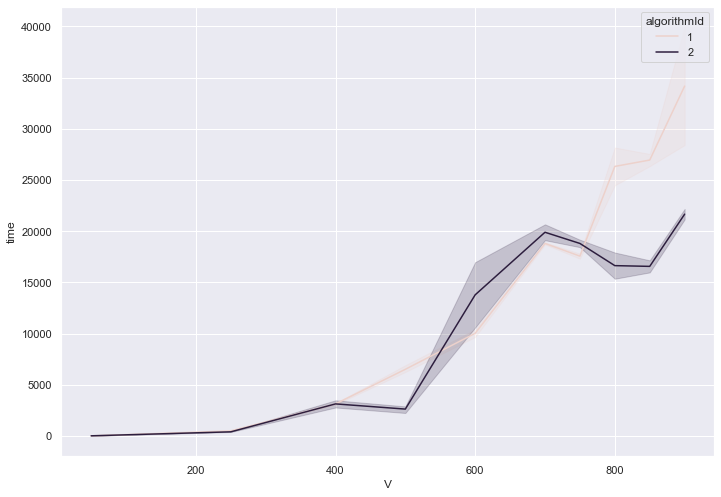

In [122]:
sns.lineplot(data=df, x='V', y='time', hue='algorithmId')

<AxesSubplot:xlabel='V', ylabel='time'>

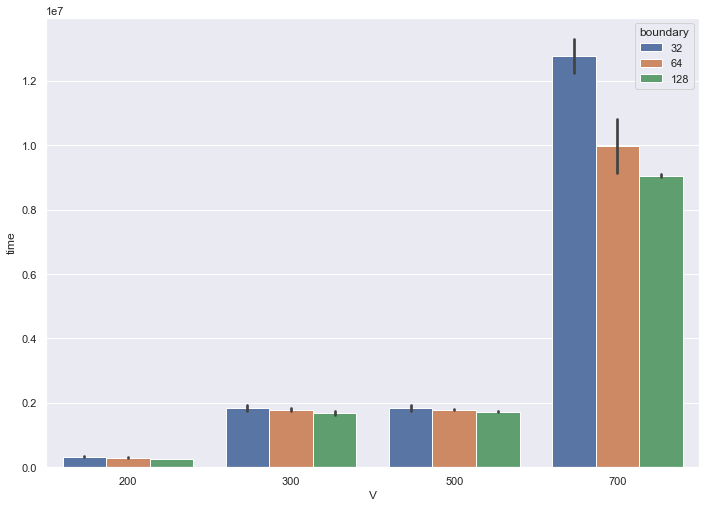

In [135]:
sns.barplot(data=df_opt_par, x='V', y='time', hue='boundary')